In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import process_time

In [2]:
def rosenbrock(x1,x2):
    return (1 - x1)**2 + 100*((x2 - (x1**2))**2)

def himmelblau(x1,x2):
    return (x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2

def grad_rosenbrock(x1,x2):
    grad1 = -2*(1-x1) - 400*x1*(x2 - x1**2)
    grad2 = 200*(x2 - x1**2)
    return grad1, grad2

def grad_himmelblau(x1,x2):
    grad1 = 4*x1*(x1**2 +x2 - 11) + 2*(x1 + x2**2 - 7)
    grad2 = 2*(x1**2 + x2 - 11) + 4 * x2 *(x1 + x2**2 - 7)
    return grad1, grad2

Plotting Rosenbrock's Function:

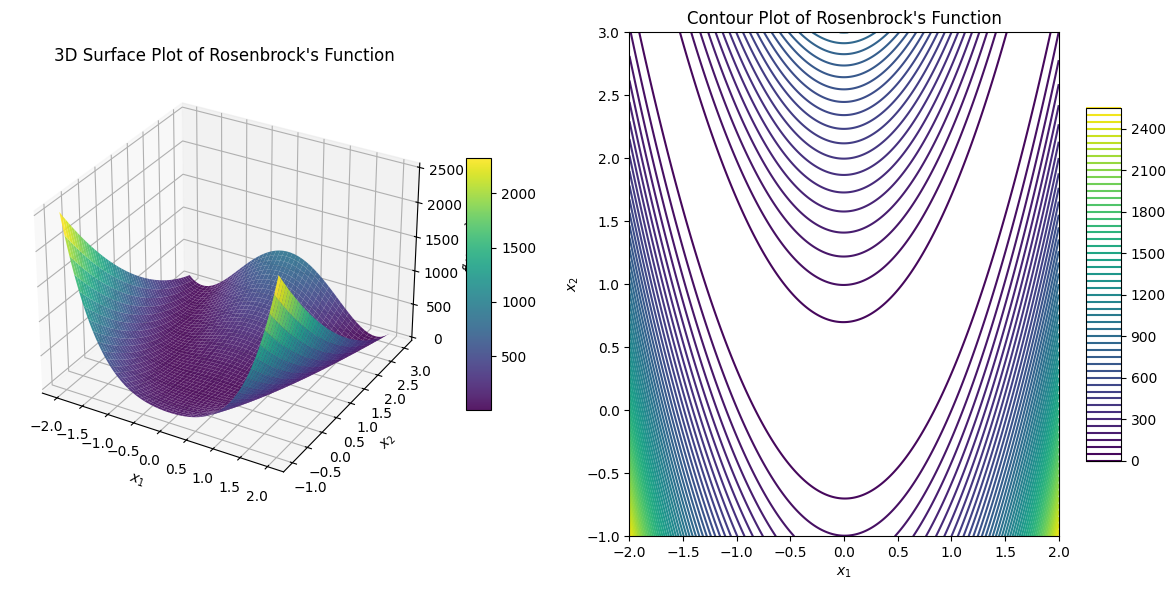

In [3]:
x1 = np.linspace(-2, 2, 500)
x2 = np.linspace(-1, 3, 500)
X1, X2 = np.meshgrid(x1, x2)
Z = rosenbrock(X1, X2)

#3D Plot"
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X1, X2, Z, cmap='viridis', edgecolor='none', alpha=0.9)
ax1.set_title("3D Surface Plot of Rosenbrock's Function")
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_zlabel('$f(x_1, x_2)$')
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=10)

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contour(X1, X2, Z, levels=50, cmap='viridis')
ax2.set_title("Contour Plot of Rosenbrock's Function")
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
fig.colorbar(contour, ax=ax2, shrink=0.7, aspect=10)

plt.tight_layout()
plt.show()

Plotting Himmelblau's Function:

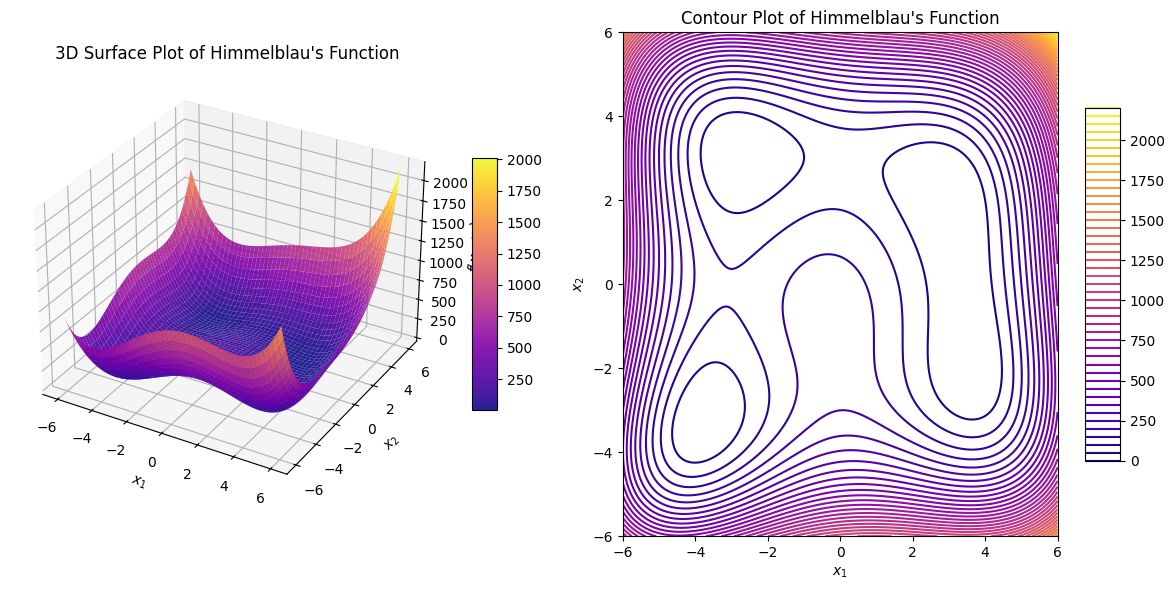

In [4]:
x1 = np.linspace(-6, 6, 500)
x2 = np.linspace(-6, 6, 500)
X1, X2 = np.meshgrid(x1, x2)
Z = himmelblau(X1, X2)

# Plot Himmelblau's function in 3D
fig = plt.figure(figsize=(12, 6))

# 3D Surface plot
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X1, X2, Z, cmap='plasma', edgecolor='none', alpha=0.9)
ax1.set_title("3D Surface Plot of Himmelblau's Function")
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_zlabel('$f(x_1, x_2)$')
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=10)

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contour(X1, X2, Z, levels=50, cmap='plasma')
ax2.set_title("Contour Plot of Himmelblau's Function")
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
fig.colorbar(contour, ax=ax2, shrink=0.7, aspect=10)

plt.tight_layout()
plt.show()


Steepest Descent (Constant) Algorithm

In [5]:
def steepest_descent_constant(x0, grad_func, step_size, tol = 1e-10):
    t1_start = process_time()
    x = x0
    iter = 0
    import numpy as np
    while np.linalg.norm(grad_func(x[0],x[1])) > tol:
        x = x - step_size * np.array(grad_func(x[0],x[1]))
        iter += 1
    print('Iterations:', iter)
    t1_stop = process_time()
    print("CPU_time:",t1_stop-t1_start)
    return x

In [6]:
x0 = np.array([0, 0])

In [7]:
xpi = np.array([np.pi + 1, np.pi - 1])

Applying the constant Steepest Descent Algorithm to the functions

In [8]:
step_size = 0.0005
tolerance = 1e-11
result = steepest_descent_constant(x0, grad_rosenbrock, step_size, tolerance)
print(result)
print("The value of the function is:", rosenbrock(result[0], result[1]))

Iterations: 120271
CPU_time: 1.847263571000001
[1. 1.]
The value of the function is: 1.2516258105461727e-22


In [9]:
step_size = 0.005
tolerance = 1e-11
result = steepest_descent_constant(xpi, grad_rosenbrock, step_size, tolerance)
print(result)
print("The value of the function is:", rosenbrock(result[0], result[1]))

Iterations: 6
CPU_time: 0.001232094000000572
[inf inf]
The value of the function is: nan


<ipython-input-2-23943fa8c31c>:8: RuntimeWarning: overflow encountered in scalar power
  grad1 = -2*(1-x1) - 400*x1*(x2 - x1**2)
<ipython-input-2-23943fa8c31c>:9: RuntimeWarning: overflow encountered in scalar power
  grad2 = 200*(x2 - x1**2)
<ipython-input-2-23943fa8c31c>:8: RuntimeWarning: invalid value encountered in scalar subtract
  grad1 = -2*(1-x1) - 400*x1*(x2 - x1**2)
<ipython-input-2-23943fa8c31c>:9: RuntimeWarning: invalid value encountered in scalar subtract
  grad2 = 200*(x2 - x1**2)
<ipython-input-2-23943fa8c31c>:2: RuntimeWarning: invalid value encountered in scalar subtract
  return (1 - x1)**2 + 100*((x2 - (x1**2))**2)


In [10]:
step_size = 0.00005
tolerance = 1e-11
result = steepest_descent_constant(xpi, grad_rosenbrock, step_size, tolerance)
print(result)
print("The value of the function is:", rosenbrock(result[0], result[1]))

Iterations: 1296467
CPU_time: 15.752421964
[1. 1.]
The value of the function is: 1.1861275100010136e-22


In [11]:
step_size = 0.0005
tolerance = 1e-11
result = steepest_descent_constant(x0, grad_himmelblau, step_size, tolerance)
print(result)
print("The value of the function is:", himmelblau(result[0], result[1]))

Iterations: 2238
CPU_time: 0.06135556899999983
[3. 2.]
The value of the function is: 1.9379977413000806e-24


In [12]:
step_size = 0.0005
tolerance = 1e-11
result = steepest_descent_constant(xpi, grad_himmelblau, step_size, tolerance)
print(result)
print("The value of the function is:", himmelblau(result[0], result[1]))

Iterations: 2093
CPU_time: 0.05717378099999948
[3. 2.]
The value of the function is: 1.9106968430921918e-24


Armijo's Step-Size Function

In [13]:
def armijo_stepsize(f, grad_f, x, d, delta=0.01, beta=0.5, max_iter=50):
    gamma = 0.001
    t = -gamma * (np.dot(np.array(grad_f(x[0], x[1])), d)/ (np.linalg.norm(d)**2))
    grad_val = grad_f(x[0], x[1])
    for _ in range(max_iter):
        new_x = x + t * d
        if f(*new_x) <= f(*x) + delta * t * np.dot(grad_val, d):
            return t
        t *= beta  # Reduce step size
        if t < 1e-10:  # Prevents infinite loop
            break
    return t

Steepest Descent Algorithm With Armijo's Step-Size

In [14]:
def steepest_descent_armijo(x0, func, grad_func, tol=1e-11, max_iter=100000):
    t2_start = process_time()
    x = np.array(x0, dtype=float)
    for i in range(max_iter):
        grad_val = np.array(grad_func(x[0], x[1]))
        grad_norm = np.linalg.norm(grad_val)
        if grad_norm < tol:
            t2_stop = process_time()
            print(f"Convergence achieved after {i} iterations.")
            print("CPU_time:", t2_stop - t2_start)
            return x
        d = -grad_val
        step_size = armijo_stepsize(func, grad_func, x, d)
        x = x + step_size * d  # Update x
        if np.any(np.abs(x) > 1e3):  # Safeguard against divergence
            t2_stop = process_time()
            print("Divergence detected. Exiting...")
            print("CPU_time:", t2_stop - t2_start)
            return None
    print("Maximum iterations reached. Exiting...")
    t2_stop = process_time()
    print("CPU_time:",t2_stop-t2_start)
    return None

Applying the Steepest Descent Algorithm with Armijo's Step-Size to the functions

In [15]:
print("For x0 = [0, 0]:")
rosen_result_x0 = steepest_descent_armijo(x0, rosenbrock, grad_rosenbrock)
print("Rosenbrock minimizer (x0):", rosen_result_x0)
print("The value of the function is:", rosenbrock(rosen_result_x0[0], rosen_result_x0[1]))

For x0 = [0, 0]:
Convergence achieved after 60128 iterations.
CPU_time: 1.991356733
Rosenbrock minimizer (x0): [1. 1.]
The value of the function is: 1.2513081007608995e-22


In [16]:
print("For xpi = [pi + 1, pi - 1]:")
rosen_result_xpi = steepest_descent_armijo(xpi, rosenbrock, grad_rosenbrock)
print("Rosenbrock minimizer (xpi):", rosen_result_xpi)
print("The value of the function is:", rosenbrock(rosen_result_xpi[0], rosen_result_xpi[1]))

For xpi = [pi + 1, pi - 1]:
Convergence achieved after 62175 iterations.
CPU_time: 2.0764347799999996
Rosenbrock minimizer (xpi): [1. 1.]
The value of the function is: 1.2513329194343134e-22


In [17]:
print("For x0 = [0, 0]:")
himmel_result_x0 = steepest_descent_armijo(x0, himmelblau, grad_himmelblau)
print("Himmelblau minimizer:", himmel_result_x0)
print("The value of the function is:", himmelblau(himmel_result_x0[0], himmel_result_x0[1]))

For x0 = [0, 0]:
Convergence achieved after 1114 iterations.
CPU_time: 0.04124779500000031
Himmelblau minimizer: [3. 2.]
The value of the function is: 1.90051738197122e-24


In [18]:
print("For xpi = [pi + 1, pi - 1]:")
himmel_result_xpi = steepest_descent_armijo(xpi, himmelblau, grad_himmelblau)
print("Himmelblau minimizer:", himmel_result_xpi)
print("The value of the function is:", himmelblau(himmel_result_xpi[0], himmel_result_xpi[1]))

For xpi = [pi + 1, pi - 1]:
Convergence achieved after 1039 iterations.
CPU_time: 0.04122036099999704
Himmelblau minimizer: [3. 2.]
The value of the function is: 1.939894162916232e-24


Generating the other Minimas

In [19]:
def find_multiple_minima(func, grad_func, bounds, num_points=100):
    minima = []
    starting_points = np.random.uniform(bounds[0], bounds[1], size=(num_points, 2))
    for x0 in starting_points:
        result = steepest_descent_armijo(x0, func, grad_func)
        if result is not None:
            # Rounding the results to avoid duplicates caused by floating-point precision
            rounded_result = np.round(result, decimals=4)
            if not any(np.allclose(rounded_result, m, atol=1e-4) for m in minima):
                minima.append(rounded_result)
    return minima

# Define bounds for starting points
bounds = [-10, 10]

himmel_minima = find_multiple_minima(himmelblau, grad_himmelblau, bounds)

print("Himmelblau's function minima:")
for minimum in himmel_minima:
    print(minimum)

Convergence achieved after 442 iterations.
CPU_time: 0.015160678000000871
Convergence achieved after 437 iterations.
CPU_time: 0.016145412000000192
Convergence achieved after 437 iterations.
CPU_time: 0.015147741999999909
Convergence achieved after 1107 iterations.
CPU_time: 0.045602258000002394
Convergence achieved after 409 iterations.
CPU_time: 0.015161441000000053
Convergence achieved after 912 iterations.
CPU_time: 0.036802608000002124
Convergence achieved after 439 iterations.
CPU_time: 0.017455042000001697
Convergence achieved after 1049 iterations.
CPU_time: 0.03463662699999759
Convergence achieved after 403 iterations.
CPU_time: 0.01529648500000036
Convergence achieved after 1001 iterations.
CPU_time: 0.05392765699999913
Convergence achieved after 975 iterations.
CPU_time: 0.036820116000001235
Convergence achieved after 1075 iterations.
CPU_time: 0.03772938300000206
Convergence achieved after 1085 iterations.
CPU_time: 0.050911060000000674
Convergence achieved after 1079 itera

In [20]:
def find_multiple_minima(func, grad_func, bounds, num_points=25):
    minima = []
    starting_points = np.random.uniform(bounds[0], bounds[1], size=(num_points, 2))
    for x0 in starting_points:
        result = steepest_descent_armijo(x0, func, grad_func)
        if result is not None:
            # Round the result to avoid duplicates caused by floating-point precision
            rounded_result = np.round(result, decimals=4)
            if not any(np.allclose(rounded_result, m, atol=1e-4) for m in minima):
                minima.append(rounded_result)
    return minima

# Define bounds for starting points
bounds = [-10, 10]

# Find all minima for Himmelblau's function
rosen_minima = find_multiple_minima(rosenbrock, grad_rosenbrock, bounds)

# Print the results
print("Rosenbrock's function minima:")
for minimum in rosen_minima:
    print(minimum)

Convergence achieved after 64775 iterations.
CPU_time: 2.5093464019999985
Convergence achieved after 60142 iterations.
CPU_time: 1.9782281410000024
Convergence achieved after 60142 iterations.
CPU_time: 1.993476825000002
Convergence achieved after 57793 iterations.
CPU_time: 1.9245839669999967
Convergence achieved after 60146 iterations.
CPU_time: 1.9837785410000066
Convergence achieved after 60142 iterations.
CPU_time: 2.9799068040000023
Convergence achieved after 65149 iterations.
CPU_time: 2.2911222870000003
Convergence achieved after 61631 iterations.
CPU_time: 1.9899881520000022
Convergence achieved after 64174 iterations.
CPU_time: 2.0980671909999984
Convergence achieved after 60142 iterations.
CPU_time: 1.9802697730000034
Convergence achieved after 60143 iterations.
CPU_time: 1.953808746
Convergence achieved after 70887 iterations.
CPU_time: 3.4656391999999983
Convergence achieved after 68454 iterations.
CPU_time: 2.2969694680000003
Convergence achieved after 61192 iterations.
C